In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

数据集：Pima 印第安人的糖尿病进行预测。

In [3]:
# 加载数据
data = pd.read_csv('./datasets/pima-indians-diabetes/diabetes.csv')
print('dataset shape {}'.format(data.shape))
data.head()

dataset shape (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


+ 0 表示阴性，没有病
+ 1 表示阳性，得病了

In [4]:
data.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [5]:
X = data.iloc[:, 0:8]
Y = data.iloc[:, 8]
print('shape of X {}; shape of Y {}'.format(X.shape, Y.shape))

shape of X (768, 8); shape of Y (768,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## 模型比较

这里选取 $3$ 个模型。

In [7]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

models = []
# 普通的 k 近邻算法
models.append(("KNN", KNeighborsClassifier(n_neighbors=2)))
# 带权重的 k 近邻算法
models.append(("KNN with weights", KNeighborsClassifier(
    n_neighbors=2, weights="distance")))
# 指定半径的 k 近邻算法
models.append(
    ("Radius Neighbors", RadiusNeighborsClassifier(n_neighbors=2, radius=500.0)))

In [8]:
results = []
for name, model in models:
    model.fit(X_train, Y_train)
    results.append((name, model.score(X_test, Y_test)))
for i in range(len(results)):
    print("name: {}; score: {}".format(results[i][0], results[i][1]))

name: KNN; score: 0.7272727272727273
name: KNN with weights; score: 0.6948051948051948
name: Radius Neighbors; score: 0.6493506493506493


# 使用交叉验证比起简单的 train_test_split 要好

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X, Y, cv=kfold)
    results.append((name, cv_result))
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(
        results[i][0], results[i][1].mean()))

name: KNN; cross val score: 0.7147641831852358
name: KNN with weights; cross val score: 0.6770505809979495
name: Radius Neighbors; cross val score: 0.6497265892002735


## 模型训练以及分析

In [10]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, Y_train)
train_score = knn.score(X_train, Y_train)
test_score = knn.score(X_test, Y_test)
print("train score: {}; test score: {}".format(train_score, test_score))

train score: 0.8387622149837134; test score: 0.7272727272727273


In [11]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


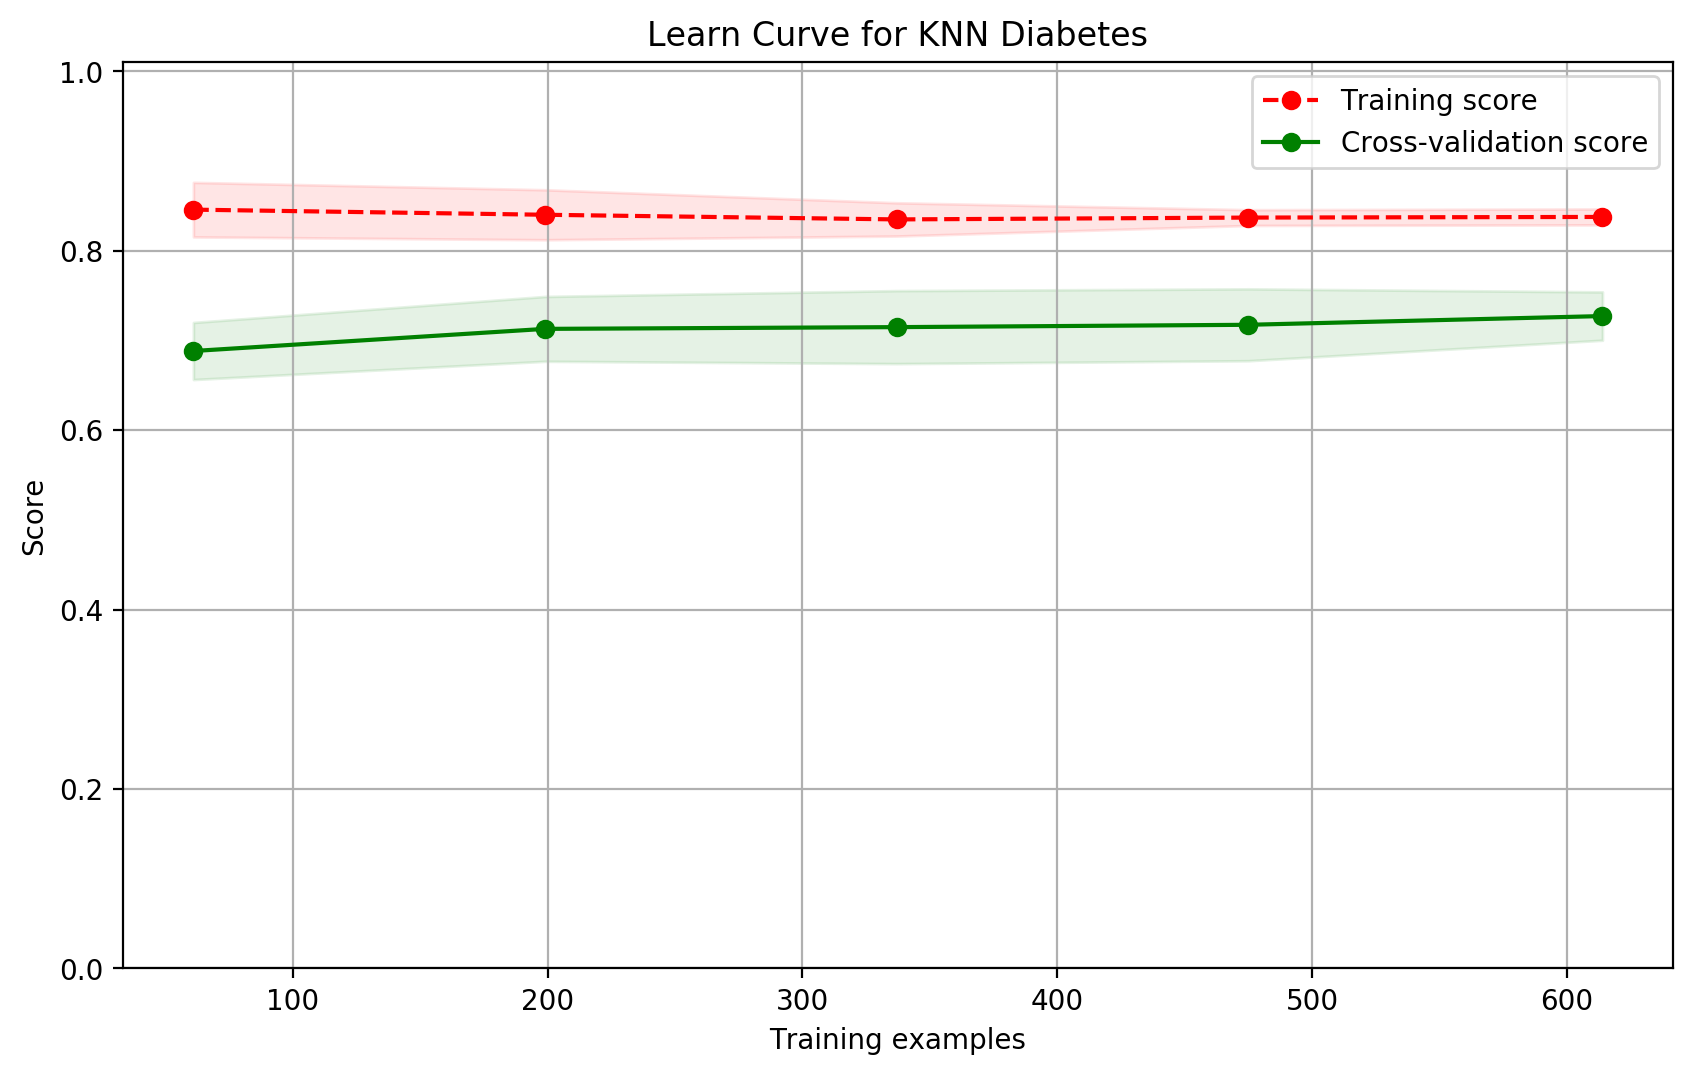

In [12]:
from sklearn.model_selection import ShuffleSplit


knn = KNeighborsClassifier(n_neighbors=2)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(10, 6), dpi=100)
plot_learning_curve(plt, knn, "Learn Curve for KNN Diabetes",
                    X, Y, ylim=(0.0, 1.01), cv=cv)

## 数据可视化

### 只选择 2 个和输出值相关性最大的特征，并且只用它们进行预测和绘图

参考资料：https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

我写的《白话“卡方检验”》

In [26]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=2)
X_new = selector.fit_transform(X, Y)
X_new[0:5]

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       [ 89. ,  28.1],
       [137. ,  43.1]])

In [30]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


可以看出，被卡方检验选择出来的特征是 Glucose（血糖浓度）和 BMI（身体质量指数）。

In [27]:
results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X_new, Y, cv=kfold)
    results.append((name, cv_result))
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(
        results[i][0], results[i][1].mean()))

name: KNN; cross val score: 0.725205058099795
name: KNN with weights; cross val score: 0.6900375939849623
name: Radius Neighbors; cross val score: 0.6510252904989747


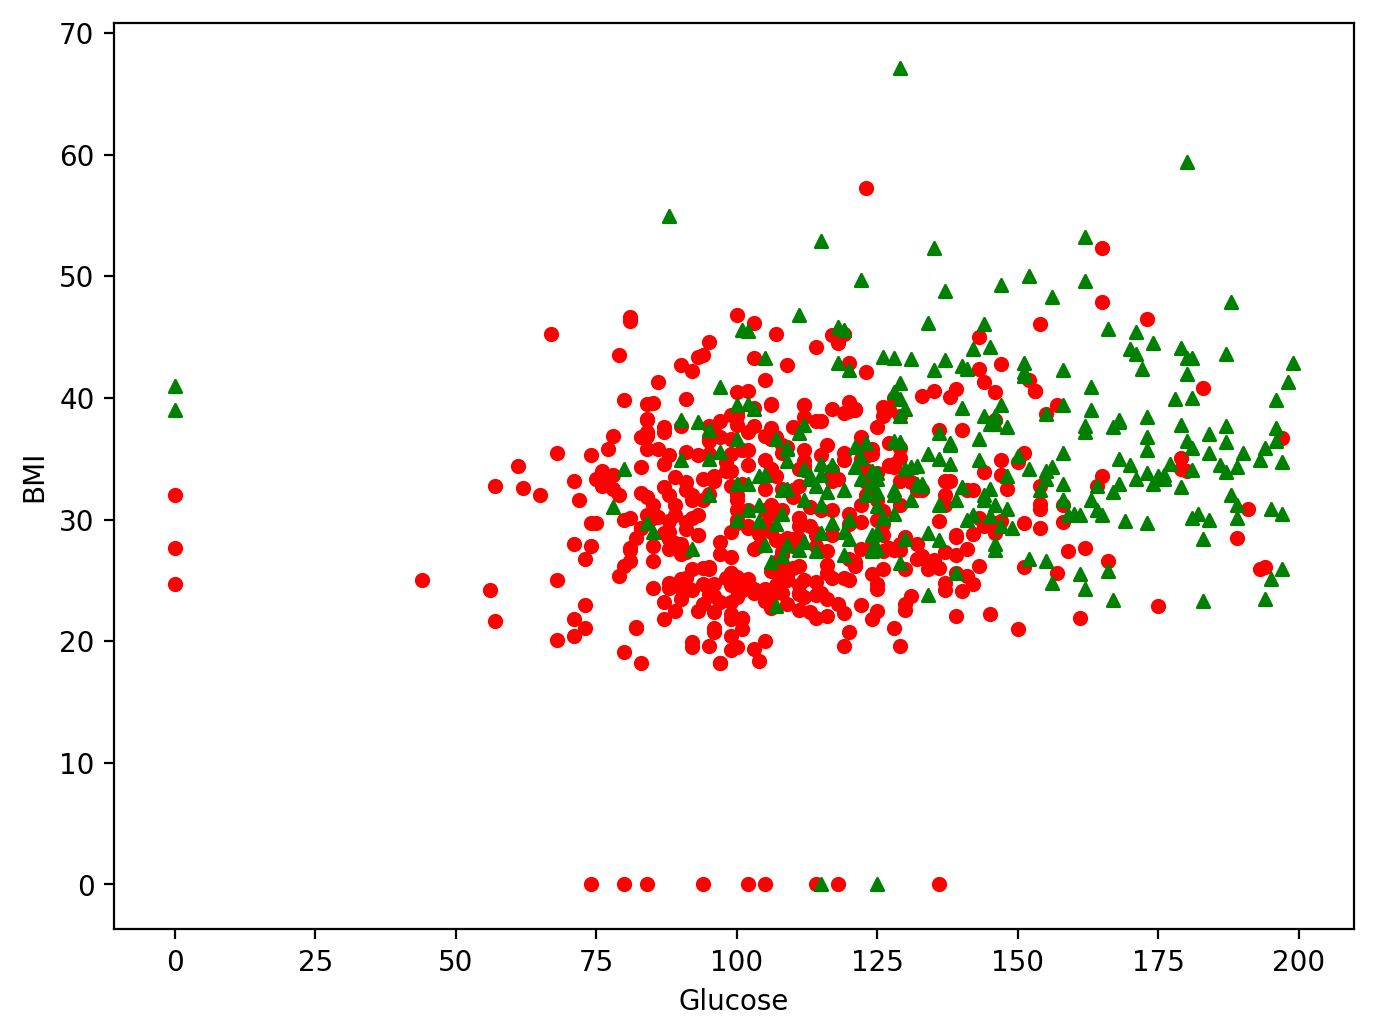

In [29]:
# 画出数据
plt.figure(figsize=(8, 6), dpi=100)
plt.ylabel("BMI")
plt.xlabel("Glucose")
plt.scatter(X_new[Y == 0][:, 0], X_new[Y == 0][:, 1],
            c='r', s=20, marker='o')         # 画出样本
plt.scatter(X_new[Y == 1][:, 0], X_new[Y == 1][:, 1],
            c='g', s=20, marker='^')         # 画出样本
plt.show()

<b><font size='3' color='ff0000'>说明：从上图可以看出，红色样本和绿色样本混在一起了，所以其实 k 近邻算法无法准确预测模型就是这个道理。</font></b>

如果是下面这种情况，k 近邻算法就会有比较好的效果。

![](https://gss0.bdstatic.com/94o3dSag_xI4khGkpoWK1HF6hhy/baike/c0%3Dbaike92%2C5%2C5%2C92%2C30/sign=9199b1866a59252db71a155655f2685e/960a304e251f95ca99a8c12ac3177f3e660952c8.jpg)